<center> <img src="logo_cesi.png" align="center" width="200px">

# Project deliverable

##### Group 3 

###### Members : 
- EGUE Funmilola
- LAVAUX Esteban
- VALLEMONT Hugo
- ROCHARD Léo


### Summary : 

Presentation of the project

Part I : Modelisation 

1 - Algorithmic complexity

2 - Mathematic modelisation

3 - Different algorithms in this case and algorithm comparison 

4 - Algorithm choice 

Partie II : Implementation and operation

1 - Algorithm’s implementation ( code)

2 - Demonstration of this implementation on multiple cases 

3 - Comprehensive experimental design demonstrating your algorithm’s performance (rename)

a - Performances

b - Limitations 

c - Prospects for improvement

### Presentation of the project

ADEME (French Environment and Energy Management Agency) has recently launched a call for expressions of interest to promote the execution of demos and experiments of new mobility solutions for people and goods, adapted to different kinds of territories.

Your CesiCDP structure is already well established in the field. With the help of many partners, you have carried out several studies on Smart Multimodal Mobility. New transport technologies, despite being more cost-effective and cleaner, also pose new challenges, particularly in terms of resource management optimization. But these transport logistics problems present a major challenge for the future: they can be applied in many areas (mail distribution, product delivery, road network maintenance, garbage collection) and their impact on the environment can be truly significant.

You are part of the team set up by CesiCDP to answer the call from ADEME. The challenge is to win new markets with very attractive financing schemes to keep developing your business activity.

CesiCDP decided to focus its study on the management of delivery routes. The algorithmic problem consists in calculating on a road network a route allowing to connect a subset of cities between them, then to return to its starting point, so as to minimize the total duration of the route. This optimization should take into account the expected traffic on each axis for the different time slots.

The idea is to propose a method from Operations Research to generate a delivery route corresponding to this problem.


## Part I : Modelisation

#### Problem modelisation 

In the course of this project, we first had to analyze the project in order to model it, and then find the best algorithmic model for solving this problem.
The aim is to create a solution in Python that will allow us to create a route on a road network to find the route that minimizes the total duration of the tour. Time is therefore our key parameter.
This route is a cycle that takes into account traffic and thus the travel time required to link several cities.
We represent it as a graph, with the edges (E) being the routes between two cities, and the vertices (V), giving us a graph G(V, E).  

#### Requirements chosen 

We decided to take the following constraint:
Each object has a specific collection point

In other words, we'll have a list of objects to collect at specific points. These objects must in turn be delivered to another specific location. This means that we need to recalculate the appropriate route for each object collected.


#### Modelisation

Without taking the additional constraint : 
In our problem, we're trying to optimize a route, so it's a NP-hard problem. 

Decision problem  
Is our problem a Hamiltonian cycle?  
Can we make our delivery man pass through each designated vertex of our graph?   

Optimization problem   
What is the shortest route for our deliveryman to complete his round?

### 1 - Algorithmic Complexity 


For a set of n! points, there are a total of n! possible paths. Since the starting point doesn't change the length of the path, it can be chosen arbitrarily, giving us (n - 1)! different paths. Finally, since each path can be traversed in two directions and both possibilities have the same length, we can divide this number by two. For example, if we name the points a, b, c and d, the paths abcd and dcba, cdab and badc, adcb and bcda, cbad and dabc all have the same length. Only the starting point and direction of travel change. There are therefore (( n - 1) !) / 2 candidate paths to consider.   


### 2 - Mathematic modelisation

###### Variables :  
- I : List of cities
- x(i,j) : represents whether a city had been visited or not on the path , take the  values 1 or 0 
- w(i,j) : Represents the edge between deux points of the graph, i.e the time of traject between to cities   
##### Objective function :  
- ∑i∑j〖x(i,j) w(i,j) 〗 
##### Requirements  :  
- ∑i∑j (x(i,j)) = ∑i∑j (x(j,i) )  
- I!=I1  
- x'(i,j)=x(i,j)  


##### Problem's Data :  
A traffic matrix T, where T(i, j, h) represents the expected traffic level between cities vi and vj at time slot h.  
###### Decision variables :  
- A binary variable x(i, j) for each pair of cities (vi, vj), indicating whether the link is included in the tour (1) or not (0).  
- A continuous variable y(i, h) for each city vi and time slot h, representing the departure time from city vi to time slot h.  
##### Objective function:  
- Minimize total tour duration:  
min ∑∑∑[T(i, j, h) * D(i, j) * x(i, j)] + ∑∑[T(i, j, h) * D(i, j) * (1 - x(i, j))] + ∑[T(i, j, h) * D(i, j) * x(j, i)]  
##### Requirements :   
- Sub-turn constraint : ∑x(i, j) + ∑x(j, i) ≤ 1 for any subset of cities S ⊆ V, |S| ≥ 2.  
- Time continuity constraint: y(i, h) - y(j, h) + M * (1 - ∑x(i, j)) ≥ D(i, j) for all (i, j) ∈ V², h ∈ schedules , where M is a sufficiently large constant.  

### 3 - Different algorithms in this case and algorithm comparison

To answer the problem, we'll need to use an algorithm to determine the best path based on our data.  

Here are the different algorithms we've thought of as a first step. This list is subject to change:  

- The travelling salesman algorithm:  

The travelling salesman algorithm is an optimization problem in which an undirected weighted graph is required to find the shortest path that passes through all points only once.  

- Chinese letter carrier algorithm:  

Used to find the shortest path in an undirected connected graph that passes through each edge at least once.

- Dijkstra's Algorithm:
Dijkstra's algorithm is a popular algorithm for finding the shortest path between a source node and all other nodes in a graph with non-negative edge weights.
It starts by assigning an initial cost of infinity to all nodes except the source node, which is assigned a cost of 0.
The algorithm then iteratively selects the node with the lowest cost and updates the costs of its neighboring nodes if a shorter path is found.

- naive solving  

###### Heuristics :  

- 2-opt:  
This algorithm is simple and relatively efficient. The principle is as follows:  

- An initial path is generated randomly (or by some other method).  
- A simple transformation (as simple as possible) is applied to this path.  
- If the transformation improves the path, we keep it, otherwise we cancel it.  
- Then repeat the operation until the path can no longer be improved. 

- Lin-Kernighan heuristic: 
The algorithm consists of iteratively exchanging a certain number of edges from a given solution to find a solution with the best cost. The algorithm works as follows:  
- T is chosen as the original, non-optimal tour.  
For each edge x of T, x is removed, and the resulting non-circular path P (T\x) is optimized by reversing the order of passage.  
If a new path P' is found that is shorter than the original P, we try to close the tom (link the two ends), and if this turn is shorter than T, we replace T with it and repeat the manoeuvre. 
- If the new tom is not shorter, we move on to another edge x.  

- A* Algorithm:
A* (pronounced "A-star") is a widely used pathfinding algorithm that combines the best features of uniform cost search and greedy best-first search.
It is particularly efficient in finding the shortest path between two nodes in a graph.
A* evaluates nodes based on their total estimated cost, combining the cost to reach the current node from the start node and the estimated cost to reach the goal node.

##### Meta heuristics :   

- genetic algorithms :  
A generic algorithm is a sequence of logical instructions that solves a problem in a general way, without being specific to a particular situation. It follows a clear and precise structure, taking data as input, manipulating it through operations and decisions, and producing a final output. Algorithms may contain loops, conditions, mathematical operations, calls to other functions and so on. It relies on logic and data analysis to achieve a desired result. A generic algorithm must be designed to be efficient, avoid infinite loops and produce correct and reliable results for a wide range of situations.    



### 4 - Algorithm choice

We choose the Tabu search algorithme because it is well adapted for our situation (others reasons and proofs)


Before that we have hesitated between 6 algorithms :
- Tabu search
The Tabu Search is a metaheuristic optimization algorithm that is used to solve combinatorial optimization problems.
In Tabu Search, a solution space is explored by iteratively moving from one solution to another based on defined neighborhood structures.
The algorithm keeps track of a short-term memory called the "Tabu List" which contains recently visited solutions.
This memory prevents the algorithm from revisiting previously explored solutions, allowing it to explore new areas of the solution space.
By dynamically adjusting its search strategy based on the Tabu List and the quality of solutions encountered,
Tabu Search aims to find high-quality solutions while efficiently exploring the solution space
We've decided to implement this one because we studied it during workshops, and it's a generic way of solving this type of problem.

- Dijkstra
It starts from a given source node and iteratively explores neighboring nodes, updating their distances from the source.
The algorithm guarantees finding the shortest paths as it greedily selects the node with the smallest distance at each step.
Once the goal is achieved, it looks the path used.

- A*
A* is basically an informed variation of Dijkstra.
A* is considered a "best first search" because it greedily chooses which vertex to explore next,
according to the value of f(v) [f(v) = h(v) + g(v)] - where h is the heuristic and g is the cost so far.
Dijkstra goes wide as A* closes in on goal


- Simulated annealing
The purpose of the simulated annealing algorithm is inspired by the cooling of the metal to solve complex problems. Based on the principle of resharpening the metal it seeks to reduce its default and achieve a more stable state. As part of optimization, this algorithm explores the solution space by randomly creating new paths and evaluating them.
What sets it apart from other optimization algorithms is its ability to occasionally accept less performing solutions in order to avoid this stuck in local minimums and find better global solutions 
What allows this is the cooling strategy which allows to adapt the probability of acceptance of the less good solutions according to the progress of the algorithm. 
Despite its relatively slow convergence and sensitivity to parameters, Simulated Annealing remains a valuable method for tackling complex optimization problems where the search for the best overall result is essential. Its flexibility, its ability to handle noisy or imperfect objective functions, and its ability to escape local minimums make it an essential tool in the optimization toolbox.
In our case this algorithm should be really good because we create a graph and have to search the best way to travel between the nodes.

- Ant colony optimization algorithms
The ant colony algorithm is a heuristic approach used to solve optimization problems, such as the traveling salesman problem. In our project, we have adapted this algorithm to solve the specific case of the travelling salesman with weights in distances.
The implemented code uses a graph representation of the cities to be visited and calculates the distances between cities using the Euclidean distance function. Ants traverse the cities, iteratively choosing the next city to visit based on deposited pheromones and distance-based heuristics. Pheromones are updated at each iteration according to the quality of the solutions found.
This ant colony approach can be beneficial in our context, as it allows us to find quality solutions for the traveling salesman problem with weights. By probabilistically exploring the solution space and updating the pheromones, the algorithm is able to converge on shorter paths over time. Thus, using this algorithm, we could obtain optimal or near-optimal routes, which would be extremely useful for solving our traveling salesman problem with weights.

- Genetic algorithm
Genetic algorithms (GAs) are optimization techniques inspired by natural selection.  
They use a population of potential solutions called individual.  
Fitness evaluation guides selection of individuals for reproduction.  
Offspring are created through crossover and mutation.  
Iterative generations lead to improved solutions.  
In our context it can be usefull because by changing the number of generation or individual, the solution can be faster or more precise

We left on the Tabu search because it is the one we were able to implement first. We were not able to implement the others until too late, which prevented us from being able to put them into action as part of this project.

However you can find them attached in the GitHub :

https://github.com/Sheydss/AdvancedAlgorithms

## Partie II : Implementation and operation

### 1 - Algorithm’s implementation 

In order to implement the algorithm we'll start by implementing a graph. 

We've decided to use a library to create the graph object, because it's optimized and hasf unctions that interest  us.

Here's the function for generating a graph:

In [77]:
import matplotlib.pyplot as plt
import itertools
import math
import random
import time
from collections import deque

#pip install networkx
import networkx as nx


class Graph:
    def __init__(self, num_nodes, max_edge):
        self.graph = nx.Graph()
        self.generate_random_graph(num_nodes, max_edge, 10, 100)

    def generate_random_graph(self, num_nodes, max_edges_per_node, min_weight, max_weight, Prints=True):
        if Prints:
            print("---------------------------------------------------------")
            print(f"Generating Graph with {num_nodes} nodes")
            tic = time.perf_counter()

        # Add nodes to graph with random coordinates
        for node in range(num_nodes):
            x = random.uniform(min_weight, max_weight)
            y = random.uniform(min_weight, max_weight)
            self.graph.add_node(node, pos=(x, y))

        # Get distance between all nodes
        for node in range(num_nodes):
            num_edges = random.randint(1, max_edges_per_node)
            dest_nodes = random.sample(range(num_nodes), num_edges)

            for dest_node in dest_nodes:
                if node != dest_node:
                    pos1 = self.graph.nodes[node]['pos']
                    pos2 = self.graph.nodes[dest_node]['pos']
                    distance = math.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
                    weight = int(distance)
                    self.graph.add_edge(node, dest_node, weight=weight)
        if Prints:
            toc = time.perf_counter()
            print(f"Generation done in {toc - tic:0.4f} seconds")
            print("---------------------------------------------------------")

    def data_graph(self):
        for node in self.graph.nodes:
            list_values = []
            print(f"Node : {node}")
            for edge in self.graph.neighbors(node):
                values = dict()
                values[edge] = self.graph[node][edge]['weight']
                list_values.append(values)
            print(list_values)

    def plot_graph(self, paths=None, colors=None):
        # Get nodes position in order to plot
        pos = nx.get_node_attributes(self.graph, 'pos')

        # Draw graph with selected edges colored
        nx.draw(self.graph, pos=pos, width=0.8, with_labels=True)

        if paths is not None:
            if colors is None:
                colors = ['black'] * len(paths)  # Par défaut, utiliser la couleur noire pour tous les chemins
            elif len(colors) < len(paths):
                raise ValueError("Le nombre de couleurs fourni est inférieur au nombre de chemins.")

            for path, color in zip(paths, colors):
                edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
                nx.draw_networkx_edges(self.graph, pos=pos, edgelist=edges, edge_color=color, width=2)

        plt.show()


# Node number
num_nodes = 10
# Edge number by node
max_edges_per_node = 5

graph = Graph(num_nodes, max_edges_per_node)

# Start point
start = 1

# End point
end = 5


---------------------------------------------------------
Generating Graph with 10 nodes
Generation done in 0.0002 seconds
---------------------------------------------------------


To display the contents of this graph, we have associated functions:

Node : 0
[{5: 34}, {6: 37}, {2: 35}, {9: 52}]
Node : 1
[{9: 23}, {2: 59}, {4: 19}]
Node : 2
[{0: 35}, {9: 67}, {1: 59}, {8: 9}]
Node : 3
[{5: 52}, {4: 49}, {7: 88}, {8: 15}]
Node : 4
[{8: 33}, {3: 49}, {5: 58}, {1: 19}, {6: 36}]
Node : 5
[{0: 34}, {3: 52}, {4: 58}, {9: 87}, {7: 61}, {6: 65}, {8: 49}]
Node : 6
[{0: 37}, {4: 36}, {5: 65}]
Node : 7
[{5: 61}, {3: 88}]
Node : 8
[{4: 33}, {9: 58}, {5: 49}, {2: 9}, {3: 15}]
Node : 9
[{1: 23}, {2: 67}, {5: 87}, {8: 58}, {0: 52}]


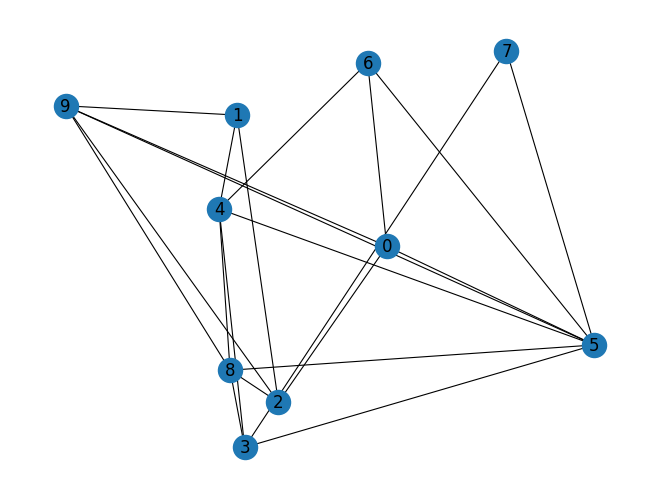

In [16]:
graph.data_graph()
graph.plot_graph()

Now, let's implement the algorithms to solve our problem : 

In [17]:
from collections import deque
import heapq
import math


def dijkstra(self, start, end):
    distances = {node: float('inf') for node in self.graph.nodes}
    distances[start] = 0

    heap = [(0, start)]
    while heap:
        current_cost, current_node = heapq.heappop(heap)

        if current_node == end:
            break

        for neighbor in self.graph.neighbors(current_node):
            cost = self.graph[current_node][neighbor]['weight']
            new_cost = current_cost + cost
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                heapq.heappush(heap, (new_cost, neighbor))

    path = reconstruct_path(graph, start, end, distances)

    return path, distances[end]


def reconstruct_path(self, start, end, distances):
    current_node = end
    path = [current_node]
    while current_node != start:
        neighbors = self.graph.neighbors(current_node)
        min_neighbor = None
        min_cost = float('inf')
        for neighbor in neighbors:
            cost = self.graph[current_node][neighbor]['weight']
            if distances[neighbor] + cost < min_cost:
                min_neighbor = neighbor
                min_cost = distances[neighbor] + cost
        path.append(min_neighbor)
        current_node = min_neighbor
    path.reverse()
    return path


def a_star(self, start, end):
    # Distance from the starting point to each node
    distances = {node: float('inf') for node in self.graph.nodes}
    distances[start] = 0

    estimations = {node: heuristic(graph, node, end) for node in self.graph.nodes}

    # Priority file to explore nodes
    heap = [(estimations[start], 0, start)]

    # Dictionary to retrieve all nodes
    came_from = {}

    while heap:
        _, current_cost, current_node = heapq.heappop(heap)

        if current_node == end:
            break

        for neighbor in self.graph.neighbors(current_node):
            cost = self.graph[current_node][neighbor]['weight']
            new_cost = current_cost + cost
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                priority = new_cost + heuristic(graph, neighbor, end)
                heapq.heappush(heap, (priority, new_cost, neighbor))
                came_from[neighbor] = current_node

    path = reverse_path(start, end, came_from)

    return path, distances[end]


def heuristic(self, node, goal):
    # Heuristic used --> distance between nodes
    pos1 = self.graph.nodes[node]['pos']
    pos2 = self.graph.nodes[goal]['pos']
    distance = math.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
    return distance


def reverse_path(start, end, came_from):
    current_node = end
    path = [current_node]
    while current_node != start:
        current_node = came_from[current_node]
        path.append(current_node)
    path.reverse()
    return path


def valeur_contenu(self, source, destination):
    if source != destination:
        return self.graph[source][destination]['weight']
    return float('inf')


def calculer_distance(chemin):
    distance_totale = 0

    for i in range(len(chemin) - 1):
        source = chemin[i]
        destination = chemin[i + 1]
        distance = valeur_contenu(graph, source, destination)
        distance_totale += distance

    return distance_totale


def tabou_search(solution_initiale, destination_finale, taille_tabou, iter_max):
    nb_iter = 0
    liste_tabou = deque(maxlen=taille_tabou)

    solution_courante = [solution_initiale]
    meilleurs_voisin = solution_courante
    meilleure_globale = solution_courante

    valeur_meilleure_globale = float('inf')

    liste_tabou.append(solution_courante)

    while nb_iter < iter_max:
        valeur_meilleure = float('inf')

        # Neighbors path
        for voisin in voisinage(graph, solution_courante[-1], liste_tabou, destination_finale, solution_courante):
            valeur_to_voisin = valeur_contenu(graph, solution_courante[-1], voisin)
            # Select best neighbor
            if valeur_to_voisin < valeur_meilleure:
                meilleurs_voisin = voisin

            valeur_meilleure = valeur_contenu(graph, solution_courante[-1], voisin)

        # Keep path to best neighbor
        if valeur_contenu(graph, solution_courante[-1], meilleurs_voisin) < valeur_meilleure_globale:
            meilleure_globale.append(meilleurs_voisin)
            if solution_courante[-1] != meilleurs_voisin:
                valeur_meilleure_globale = valeur_contenu(graph, solution_courante[-1], meilleurs_voisin)
            nb_iter = 0
        else:
            nb_iter += 1

        solution_courante = meilleure_globale
        liste_tabou.append(meilleurs_voisin)

        if solution_courante[-1] == destination_finale:
            break

    distance_meilleure_globale = calculer_distance(meilleure_globale)
    return meilleure_globale, distance_meilleure_globale


def voisinage(self, node, visited, destination_finale, solution_courante):
    voisins = []
    for v in self.graph.neighbors(node):
        if v not in visited or v == destination_finale:
            if v not in solution_courante:
                voisins.append(v)
    return voisins


print(dijkstra(graph, start, end))
print(a_star(graph, start, end))
print(tabou_search(start, end, 10, 200))

([1, 4, 5], 77)
([1, 4, 5], 77)
([1, 4, 6, 0, 5], 126)


Now let's create the objects and a function to determine the best route based on the lowest cost.

In [97]:
import itertools
import time
import random


def create_objects(max_entiers, max_valeur, start, end, remove_list=None):
    if max_entiers > max_valeur - 2:
        raise ValueError("Le maximum d'entiers ne peut pas être supérieur à la différence entre max_valeur et 2")

    entiers = list(set(range(max_valeur)) - {start, end})
    if remove_list is not None:
        entiers = [x for x in entiers if x not in remove_list]
    entiers = random.sample(entiers, max_entiers)
    return entiers


def best_itinerary(points, start, end, method, size=30, iteration=200, Prints=True, nb_package=0):

    tic = time.perf_counter()

    best_objects_path = [start]
    chemin_global = []
    cout_meilleur_chemin = float('inf')

    if nb_package > 0 :
        colis = create_objects(2, len(graph.graph), start, end, points)
        if Prints:
            print(f"Package from : {colis[0]} to {colis[1]}")
        if colis[0] not in points:
            points.append(colis[0])
    else:
        colis = [-1, -1]

    for permutation in itertools.permutations(points):
        path_start, cout_start = dijkstra(graph, start, permutation[0])
        cout_total = cout_start

        paths = []
        paths.extend(path_start)

        for i in range(len(permutation) - 1):
            point_actuel = permutation[i]
            if point_actuel == colis[0]:
                if colis[1] not in points:
                    points.append(colis[1])
                    return best_itinerary(points, start, end, method, size, iteration, Prints, nb_package -1)
            point_suivant = permutation[i + 1]
            match(method) :
                case 'tabou':
                        path, cout = tabou_search(point_actuel, point_suivant, size, iteration)
                case 'a*':
                        path, cout = a_star(graph, point_actuel, point_suivant)
                case other:
                        method = 'dijkstra'
                        path, cout = dijkstra(graph, point_actuel, point_suivant)
            cout_total += cout
            paths.extend(path)

        if cout_total < cout_meilleur_chemin:
            cout_meilleur_chemin = cout_total
            best_objects_path = list(permutation)
            chemin_global = paths[:]


    path_end, cout_end = dijkstra(graph, chemin_global[-1], end)
    chemin_global.extend(path_end)
    cout_meilleur_chemin += cout_end

    chemin_global = remove_consecutive_duplicates(chemin_global)
    toc = time.perf_counter()
    if Prints:
        print(f"Objects Path: {best_objects_path}")
        print(f"Method: {method}")
        print(f"Path: {chemin_global}")
        print(f"Cost: {cout_meilleur_chemin}")
        print(f"Duration: {toc - tic:0.4f} seconds")
        print("---------------------------------------------------------")

    points = []
    return best_objects_path, cout_meilleur_chemin, chemin_global, round(toc - tic, 4)



def remove_consecutive_duplicates(lst):
    result = [lst[0]]

    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1]:
            result.append(lst[i])

    return result


def base_itinerary_cost(self, path):
    distance_totale = 0

    for i in range(len(path) - 1):
        source = path[i]
        destination = path[i + 1]
        _, distance = self.dijkstra(source, destination)
        distance_totale += distance

    return distance_totale

### 2 - Demonstration of this implementation on multiple cases

##### Case I :

Let's try with 10 nodes and 2 objects :

Objects Path: [24, 31]
Method: dijkstra
Path: [1, 4, 33, 44, 24, 31, 49, 10, 33, 4, 1]
Cost: 402
Duration: 0.0056 seconds
---------------------------------------------------------
Objects Path: [31, 24]
Method: tabou
Path: [1, 4, 33, 10, 49, 31, 49, 2, 30, 33, 44, 41, 46, 29, 3, 25, 45, 47, 18, 48, 14, 22, 40, 0, 27, 24, 44, 33, 4, 1]
Cost: 1047
Duration: 0.0080 seconds
---------------------------------------------------------
Objects Path: [24, 31]
Method: a*
Path: [1, 4, 33, 44, 24, 31, 49, 10, 33, 4, 1]
Cost: 402
Duration: 0.0028 seconds
---------------------------------------------------------


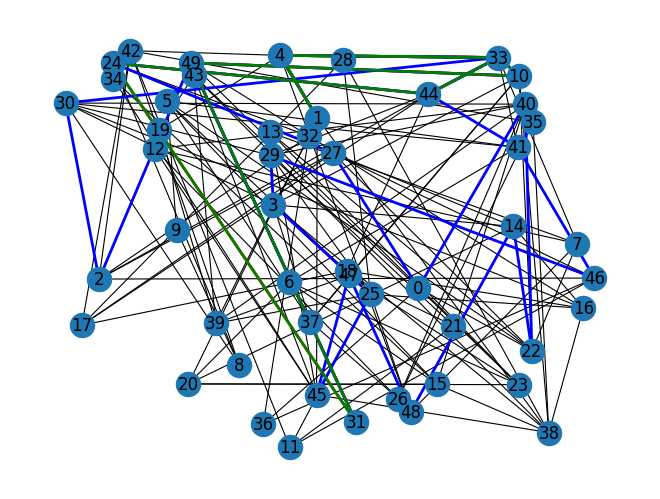

In [91]:
# Generate nodes to visit
obj = create_objects(2, num_nodes, start, end)

# Determine the best path that go through generated nodes
path, cost, chemin_g, _ = best_itinerary(obj, start, start, 'dijkstra')
path2, cost2, chemin_g2, _ = best_itinerary(obj, start, start, 'tabou')
path3, cost3, chemin_g3, _ = best_itinerary(obj, start, start, 'a*')
graph.plot_graph([chemin_g, chemin_g2, chemin_g3], ['red', 'blue', 'green'])

##### Case II :

Let's try with 2000 nodes and 2 objects:

In [103]:
# Nodes number
num_nodes = 2000
# Edge number by node
max_edges_per_node = 5

graph = Graph(num_nodes, max_edges_per_node)

# Start point
start = 1

# Generate nodes that we want to visit
obj = create_objects(2, num_nodes, start, end)

# Determine best path
path, cost, chemin_g, _ = best_itinerary(obj, start, start, 'dijkstra')
path2, cost2, chemin_g2, _ = best_itinerary(obj, start, start, 'tabou', 2000, 10000)
path3, cost3, chemin_g3, _ = best_itinerary(obj, start, start, 'a*')

---------------------------------------------------------
Generating Graph with 2000 nodes
Generation done in 0.0550 seconds
---------------------------------------------------------
Objects Path: [97, 1901]
Method: dijkstra
Path: [1, 1568, 813, 1521, 558, 97, 1454, 928, 1978, 1047, 1541, 956, 1901, 956, 1541, 268, 63, 1]
Cost: 559
Duration: 0.0843 seconds
---------------------------------------------------------
Objects Path: [97, 1901]
Method: tabou
Path: [1, 1568, 813, 1521, 558, 97, 1831, 929, 1166, 1264, 1779, 1439, 599, 1240, 376, 378, 1708, 1734, 1641, 1760, 474, 573, 1550, 651, 1798, 1415, 1465, 1620, 177, 1905, 1282, 257, 1307, 1136, 1468, 1291, 1555, 1244, 1500, 1939, 1080, 321, 1712, 39, 1062, 803, 1839, 787, 1543, 1239, 1961, 479, 1184, 1884, 1285, 631, 339, 488, 924, 1608, 1992, 721, 1182, 1950, 1047, 1946, 1414, 507, 1565, 853, 1716, 1563, 1251, 585, 1724, 406, 297, 1172, 1234, 1713, 983, 1758, 1947, 1721, 427, 1849, 1616, 1147, 1997, 1942, 1674, 349, 1529, 1407, 1344, 14

##### Case III :

Let's implement the constraint and have a look on the behavior :

In [102]:
# Nodes number
num_nodes = 50
# Edge number by node
max_edges_per_node = 5

graph = Graph(num_nodes, max_edges_per_node)

# Start point
start = 1

# Generate nodes that we want to visit
obj = create_objects(3, num_nodes, start, end)
print(f"City that we have to visit : {obj}")

# Package that we have to collect
nb_collect = 2


# Determine best path
path, cost, chemin_g, _ = best_itinerary(obj, start, start, 'dijkstra', nb_package=nb_collect)


---------------------------------------------------------
Generating Graph with 50 nodes
Generation done in 0.0006 seconds
---------------------------------------------------------
City that we have to visit : [40, 11, 41]
Package from : 22 to 19
Package from : 8 to 28
Objects Path: [22, 19, 8, 41, 40, 11, 28]
Method: dijkstra
Path: [1, 19, 22, 19, 8, 9, 41, 23, 40, 3, 11, 14, 28, 46, 45, 19, 1]
Cost: 345
Duration: 5.1416 seconds
---------------------------------------------------------


### 3 - Comprehensive experimental design demonstrating your algorithm’s performance (rename)

#### a - Performances

This algorithm have many interesing features which are important or interesing for solving our problem.


In [166]:
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection

################## Test by increasing number of nodes ##################
increaseOfNodes = [[10, 5, 2], [20, 5, 2], [50, 5, 2], [100, 5, 2], [200, 5, 2], [300, 5, 2], [500, 5, 2]]
data1nodes = []
data2nodes = []
data3nodes = []

for i in range(len(increaseOfNodes)):
  num_nodes = increaseOfNodes[i][0]
  max_edges_per_node = increaseOfNodes[i][1]
  nb_object = increaseOfNodes[i][2]
  graph = Graph(num_nodes, max_edges_per_node, Prints=False)
  start = 1
  obj = create_objects(nb_object, num_nodes, start, start)
  path, cost, chemin_g, time1 = best_itinerary(obj, start, start, 'dijkstra', Prints=False)
  data1nodes.append([path, cost, chemin_g, time1])
  path2, cost2, chemin_g2, time2 = best_itinerary(obj, start, start, 'a*', Prints=False)
  data2nodes.append([path2, cost2, chemin_g2, time2])
  path3, cost3, chemin_g3, time3 = best_itinerary(obj, start, start, 'tabou', num_nodes, num_nodes * 5, Prints=False)
  data3nodes.append([path3, cost3, chemin_g3, time3])

################# Test by increasing number of objects #################
increaseOfObjects = [[100, 5, 2], [100, 5, 4], [100, 5, 6], [100, 5, 8], [100, 5, 10], [100, 5, 15], [100, 5, 20]]
data1objects = []
data2objects = []
data3objects = []

for i in range(len(increaseOfObjects)):
  num_nodes = increaseOfNodes[i][0]
  max_edges_per_node = increaseOfNodes[i][1]
  nb_object = increaseOfNodes[i][2]
  graph = Graph(num_nodes, max_edges_per_node, Prints=False)
  start = 1
  obj = create_objects(nb_object, num_nodes, start, start)
  path, cost, chemin_g, time1 = best_itinerary(obj, start, start, 'dijkstra', Prints=False)
  data1objects.append([path, cost, chemin_g, time1])
  path2, cost2, chemin_g2, time2 = best_itinerary(obj, start, start, 'a*', Prints=False)
  data2objects.append([path2, cost2, chemin_g2, time2])
  path3, cost3, chemin_g3, time3 = best_itinerary(obj, start, start, 'tabou', num_nodes, num_nodes * 5, Prints=False)
  data3objects.append([path3, cost3, chemin_g3, time3])


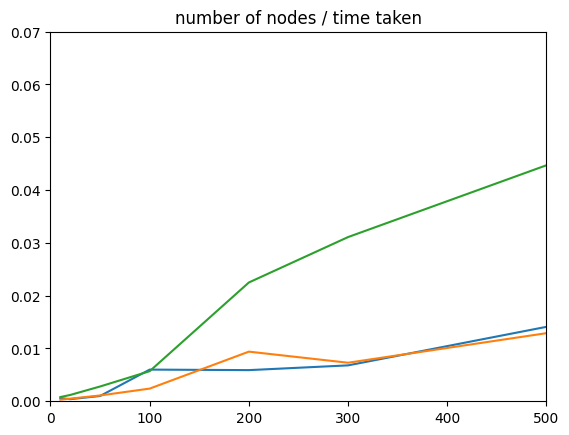

In [167]:
########### Chart with x = number of nodes and y = time taken ###########
#take data that interest us
ydata1 = []
ydata2 = []
ydata3 = []
xdata = []
for i in range(len(data1nodes)):
  ydata1.append(data1nodes[i][3])
  ydata2.append(data2nodes[i][3])
  ydata3.append(data3nodes[i][3])
for j in range(len(increaseOfNodes)):
  xdata.append(increaseOfNodes[j][0])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata, ydata1, color='tab:blue')
ax.plot(xdata, ydata2, color='tab:orange')
ax.plot(xdata, ydata3, color='tab:green')

# set the limits
ax.set_xlim([0, 500])
ax.set_ylim([0, 0.07])

ax.set_title('Execution time / Nodes number')

# display the plot
plt.show()

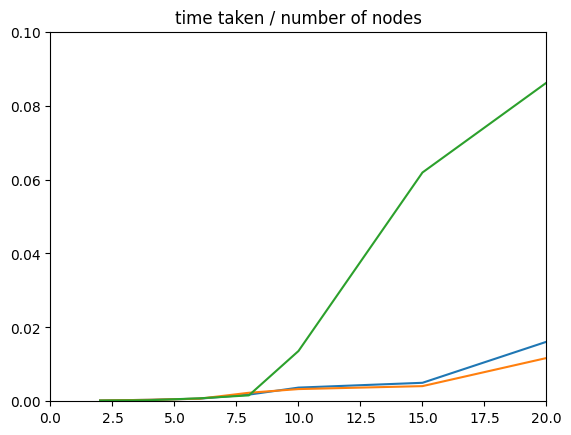

In [171]:
########### Chart with x = number of nodes and y = time taken ###########
ydata1 = []
ydata2 = []
ydata3 = []
xdata = []
for i in range(len(data1nodes)):
  ydata1.append(data1objects[i][3])
  ydata2.append(data2objects[i][3])
  ydata3.append(data3objects[i][3])
for j in range(len(increaseOfObjects)):
  xdata.append(increaseOfObjects[j][2])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata, ydata1, color='tab:blue')
ax.plot(xdata, ydata2, color='tab:orange')
ax.plot(xdata, ydata3, color='tab:green')

# set the limits
ax.set_xlim([0, 20])
ax.set_ylim([0, 0.1])

ax.set_title('Execution time / Nodes number')

# display the plot
plt.show()


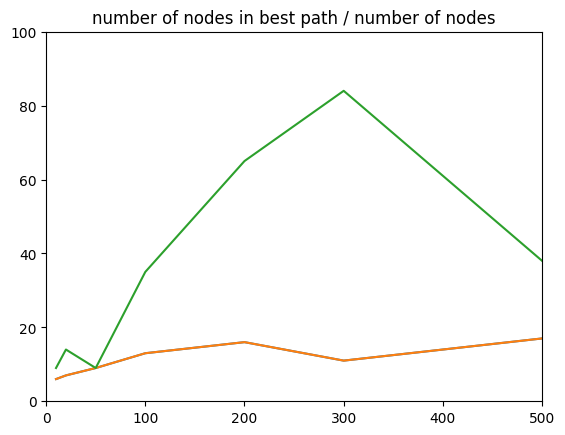

In [189]:
########### Chart with x = number of nodes and y = number of nodes in path ###########
#take data that interest us
ydata1 = []
ydata2 = []
ydata3 = []
xdata = []
for i in range(len(data1nodes)):
  ydata1.append(len(data1nodes[i][2]))
  ydata2.append(len(data2nodes[i][2]))
  ydata3.append(len(data3nodes[i][2]))
for j in range(len(increaseOfNodes)):
  xdata.append(increaseOfNodes[j][0])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata, ydata1, color='tab:blue')
ax.plot(xdata, ydata2, color='tab:orange')
ax.plot(xdata, ydata3, color='tab:green')

# set the limits
ax.set_xlim([0, 500])
ax.set_ylim([0, 100])

ax.set_title('number of nodes in best path / number of nodes')

# display the plot
plt.show()

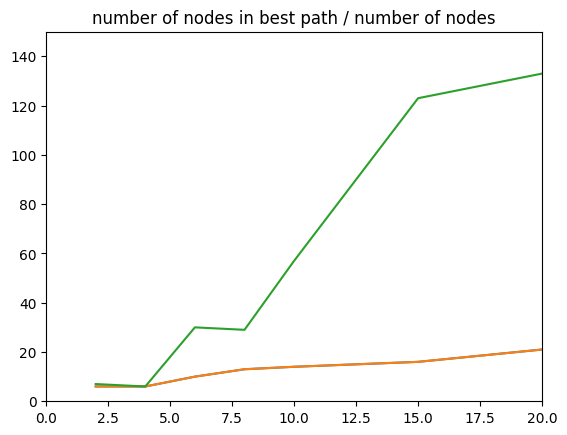

In [183]:
########### Chart with x = number of nodes and y = number of nodes in best path ###########
ydata1 = []
ydata2 = []
ydata3 = []
xdata = []
for i in range(len(data1objects)):
  ydata1.append(len(data1objects[i][2]))
  ydata2.append(len(data2objects[i][2]))
  ydata3.append(len(data3objects[i][2]))
for j in range(len(increaseOfObjects)):
  xdata.append(increaseOfObjects[j][2])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata, ydata1, color='tab:blue')
ax.plot(xdata, ydata2, color='tab:orange')
ax.plot(xdata, ydata3, color='tab:green')

# set the limits
ax.set_xlim([0, 20])
ax.set_ylim([0, 150])

ax.set_title('Nodes number in the best path / Nodes number')

# display the plot
plt.show()

#### b - Limitations

All algorithms aren't perfect, they have flaws and ours don't fall under the rule.
Especially the Tabu search, which may take a less-than-optimized path.
The problem, as we've seen, is that we need to adjust the parameters according to our needs, and this algorithm takes a long time to run.


#### c - Prospects for improvements

Even if this algorithm isn't perfect, it is still possible to improve it. In order to transform this algorithm we got some ideas :

- implement other functionality offered within the list or use another algorithm
- make a development more geared towards long-term maintainability 
- used higher standards
- used a connected solution like web site or mobile app 

#### d - bibliography

    - https://datascientest.com/lalgorithme-a-a-star-algorithm
    - http://160592857366.free.fr/joe/ebooks/ShareData/Heuristics%20for%20the%20Traveling%20Salesman%20Problem%20By%20Christian%20Nillson.pdf
    - https://medium.com/geekculture/how-to-represent-a-graph-data-structure-in-python-9f0df57e33a2
    - https://haltode.fr/algo/structure/graphe.html
    - https://www.esen.tn/portail/medias/documents/enseignement/1506930193479.pdf
    - https://fr.wikipedia.org/wiki/Analyse_de_la_complexit%C3%A9_des_algorithmes
    - https://openclassrooms.com/fr/courses/7527306-decouvrez-le-fonctionnement-des-algorithmes/7760669-calculez-la-complexite-algorithmique
    - https://www.scaler.com/topics/data-structures/dijkstra-algorithm/
    - http://xavierdupre.fr/app/ensae_teaching_cs/helpsphinx////notebooks/2021_random_graph.html
    - https://medium.com/@mehaksingal13/timing-your-code-in-python-performance-of-algorithm-d1e721dda4fe
    - https://github.com/AaronHe7/pathfinder/blob/master/a_star.py
    - https://osmnx.readthedocs.io/en/stable/
    - https://datascientest.com/networkx-tout-savoir
    - https://towardsdatascience.com/find-and-plot-your-optimal-path-using-plotly-and-networkx-in-python-17e75387b873
    - https://www.openstreetmap.org/#map=10/47.2275/-2.3332
    - https://github.com/0kzh/pathfinding-visualizer